### exercise


#### batch norm

题外话,出错的写法

**feed_dict里直接用的是tensor,其实应该先用sess.run把这个tensor结果运行出来结果,然后把这个结果赋值给feed_dict.**

出错的:
```python
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    ###x_val=sess.run(x_value)
    feed_dict = {
    x:x_value###x_val
    }
    print(sess.run([h_r],feed_dict=feed_dict))

```

In [7]:
import tensorflow as tf

x = tf.placeholder(tf.float32, [64, 28,28,1])

w= tf.truncated_normal([5,5,1,32], stddev=0.1)

b = tf.constant(0.1, shape=[32])

h = tf.nn.conv2d(x, w, strides=[1, 1, 1, 1], padding='SAME') + b

h_bn = tf.contrib.layers.batch_norm(h, decay=0.9, updates_collections=None, epsilon=1e-5, scale=True, is_training=True)#, scope="bn")

h_r = tf.nn.relu(h_bn)

x_value=tf.random_normal(shape=[64, 28,28,1],mean=5,stddev=2.0)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    x_val=sess.run(x_value)
    feed_dict = {
    x:x_val
    }
    print(sess.run([h_r],feed_dict=feed_dict))

    

[array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          5.26139922e-02, 9.96644516e-03, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.46948135e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          6.30268693e-01, 0.00000000e+00, 0.00000000e+00],
         [3.66652817e-01, 0.00000000e+00, 3.05536985e-01, ...,
          1.38459146e+00, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 7.37867057e-02, 0.00000000e+00, ...,
          0.00000000e+00, 7.07124233e-01, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 4.50746000e-01, ...,
          0.00000000e+00, 1.44242597e+00, 0.00000000e+00],
       

----
#### tf.group和tf.identify

> tf.group是个组合操作.它返回的是op.但是它会组合一组ops.

In [2]:
import tensorflow as tf
x = tf.Variable(0.0)
x_plus = tf.assign_add(x, 1) # 这是一个引用加法.
with tf.control_dependencies([x_plus]):#只有当内部为操作时以来才会生效, 它会让这个[x_puls]先执行,执行完之后在执行其修饰的操作内容.
    #y = tf.identity(x)#将该语句变为操作
    y = x
    update = tf.group(y)#将该语句变为操作
init = tf.global_variables_initializer()
with tf.Session() as session:
    init.run()
    for i in range(5):
        session.run(update)
        print("x_plus:",x_plus.eval())
        print(y.eval())
    print(x.eval())#5


x_plus: 2.0
2.0
x_plus: 4.0
4.0
x_plus: 6.0
6.0
x_plus: 8.0
8.0
x_plus: 10.0
10.0
10.0


看下`assign_add`的功效

In [3]:
import tensorflow as tf
x=tf.Variable(0.0)
y=tf.add(x,1)
ref_x=tf.assign_add(x,1)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(x.eval())
    print(y.eval())
    print(ref_x.eval())
    print("after assigned add",x.eval())

0.0
1.0
1.0
after assigned add 1.0


`tf.identify`的效果:
> 也是一种引用

In [8]:
import tensorflow as tf
x = tf.Variable(0.0)
x_plus = tf.assign_add(x, 1) # 这是一个引用加法.
with tf.control_dependencies([x_plus]):#只有当内部为操作时以来才会生效, 它会让这个[x_puls]先执行,执行完之后在执行其修饰的操作内容.
    y=tf.identity(x)
init = tf.global_variables_initializer()
with tf.Session() as session:
    init.run()
    for i in range(5):
        print(y.eval())
    print(x.eval())#5

1.0
2.0
3.0
4.0
5.0
5.0


---
#### tf.shape
---
可以取到该tensor的shape信息.

In [4]:
import tensorflow as tf
x=tf.constant(0.1,shape=[1,2,3,32])
x_shape=tf.shape(x)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(x_shape.eval())

[ 1  2  3 32]


----
#### tf.train.batch

批量数据读取

**实验: 产生一个有序数列,读出来也是有序的.**

----

In [ ]:
import tensorflow as tf
import numpy as np

def generate_data():
    num = 25
    label = np.asarray(range(0, num))
    images = np.random.random([num, 5, 5, 3])
    print('label size :{}, image size {}'.format(label.shape, images.shape))
    return label, images

def get_batch_data():
    label, images = generate_data()
    images = tf.cast(images, tf.float32)
    label = tf.cast(label, tf.int32)
    input_queue = tf.train.slice_input_producer([images, label], shuffle=False)
    image_batch, label_batch = tf.train.batch(input_queue, batch_size=10, num_threads=1, capacity=64)
    return image_batch, label_batch

image_batch, label_batch = get_batch_data()
with tf.Session() as sess:
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess, coord)
    i = 0
    try:
        while not coord.should_stop():
            image_batch_v, label_batch_v = sess.run([image_batch, label_batch])
            i += 1
            for j in range(10):
                print(image_batch_v.shape, label_batch_v[j])
    except tf.errors.OutOfRangeError:
        print("done")
    finally:
        coord.request_stop()
    coord.join(threads)



----
#### tf.name_scope

是在名字前面在加一个domain.

----


In [5]:
import tensorflow as tf;  
import numpy as np;  
import matplotlib.pyplot as plt;  
 
with tf.name_scope('V1'):
    # a1 = tf.get_variable(name='a1', shape=[1], initializer=tf.constant_initializer(1))
    a2 = tf.Variable(tf.random_normal(shape=[2,3], mean=0, stddev=1), name='a2')
with tf.name_scope('V2'):
    # a3 = tf.get_variable(name='a1', shape=[1], initializer=tf.constant_initializer(1))
    a4 = tf.Variable(tf.random_normal(shape=[2,3], mean=0, stddev=1), name='a2')
  
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # print a1.name
    print(a2.name)
    # print a3.name
    print(a4.name)

V1_1/a2:0
V2_1/a2:0


----
#### tf.image.resize_images


做image的resize.

----

[[[225 137 123]
  [225 137 125]
  [222 137 132]
  ...
  [236 153 123]
  [224 136 112]
  [205 105  90]]

 [[223 137 122]
  [227 137 128]
  [221 138 130]
  ...
  [232 151 122]
  [223 133 107]
  [203 101  89]]

 [[227 137 126]
  [223 136 126]
  [224 136 134]
  ...
  [230 149 122]
  [218 130 110]
  [199 101  90]]

 ...

 [[ 81  19  60]
  [ 84  17  58]
  [ 88  28  56]
  ...
  [174  74  82]
  [174  69  74]
  [176  64  80]]

 [[ 81  22  54]
  [ 81  22  54]
  [ 95  32  59]
  ...
  [180  73  81]
  [181  72  78]
  [187  77  80]]

 [[ 79  22  55]
  [ 79  22  57]
  [ 95  30  60]
  ...
  [182  71  80]
  [182  72  81]
  [188  75  79]]]


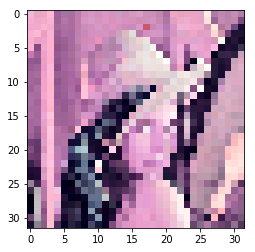

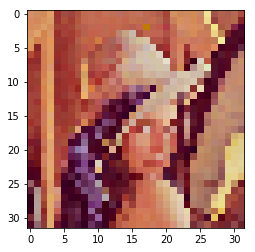

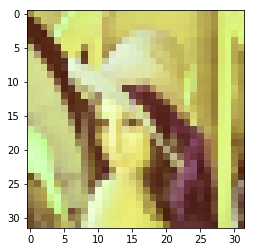

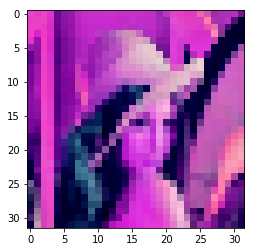

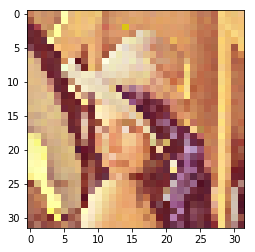

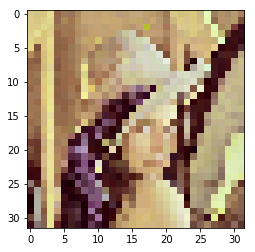

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
 
def distort_color(image, color_ordering = 0):
    if color_ordering == 0:
        image = tf.image.random_brightness(image, max_delta = 32. / 255.)
        image = tf.image.random_saturation(image, lower = 0.5, upper = 1.5)
        image = tf.image.random_hue(image, max_delta = 0.2)
        image = tf.image.random_contrast(image, lower = 0.5, upper = 1.5)
    elif color_ordering == 1:
        image = tf.image.random_saturation(image, lower = 0.5, upper = 1.5)
        image = tf.image.random_brightness(image, max_delta = 32. / 255.)
        image = tf.image.random_contrast(image, lower = 0.5, upper = 1.5)
        image = tf.image.random_hue(image, max_delta = 0.2)
    elif color_ordering == 2:
        image = tf.image.random_hue(image, max_delta = 0.2)
        image = tf.image.random_saturation(image, lower = 0.5, upper = 1.5)
        image = tf.image.random_brightness(image, max_delta = 32. / 255.)
        image = tf.image.random_contrast(image, lower = 0.5, upper = 1.5)
    return tf.clip_by_value(image, 0.0, 1.0)
 
def preprocess_for_train(image, new_shape):
    #if bbox is None:
        #bbox = tf.constant([0.0, 0.0, 1.0, 1.0], dtype = tf.float32, shape = [1, 1, 4])
    #if image.dtype != tf.float32:
    image = tf.image.convert_image_dtype(image, dtype = tf.float32)
        
    #bbox_begin, bbox_size, _ = tf.image.sample_distorted_bounding_box(tf.shape(image), bounding_boxes = bbox)
    #distorted_image = tf.slice(image, bbox_begin, bbox_size)
    
    distorted_image = tf.image.resize_images(image, new_shape, method = np.random.randint(4))
    
    distorted_image = tf.image.random_flip_left_right(distorted_image)
    
    distorted_image = distort_color(distorted_image, np.random.randint(2))
    
    return distorted_image
 
image_raw_data = tf.gfile.FastGFile("lena.jpg",'rb').read()
with tf.Session() as sess:
    img_data = tf.image.decode_jpeg(image_raw_data)
    print(img_data.eval())
    #boxes = tf.constant([[0.05, 0.05, 0.9, 0.7], [0.35, 0.47, 0.5, 0.56]])
    
    for i in range(6):
        result = preprocess_for_train(img_data, [32, 32])
        plt.imshow(result.eval())
        plt.show()


----

#### tf.squeeze And tf.expand_dims

`tf.expand_dims`会在指定dim上增加一维度,但是不会给这个维度赋值.

----

In [1]:
import tensorflow as tf
# 't' is a tensor of shape [2]
t=tf.constant(value=2,shape=[1])
a=tf.expand_dims(t,0)
b=tf.expand_dims(t,1)
c=tf.expand_dims(t,-1)

a_sp=tf.shape(a)
b_sp=tf.shape(b)
c_sp=tf.shape(c)

t2=tf.constant(value=[2,3,5])
a2=tf.expand_dims(t2,0)
b2=tf.expand_dims(t2,1)
c2=tf.expand_dims(t2,-1)

a2_sp=tf.shape(a2)
b2_sp=tf.shape(b2)
c2_sp=tf.shape(c2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("shapes:")
    print(a_sp.eval())
    print(b_sp.eval())
    print(c_sp.eval())
    print("values:")
    print(a.eval())
    print(b.eval())
    print(c.eval())
    
    print("shapes:")
    print(a2_sp.eval())
    print(b2_sp.eval())
    print(c2_sp.eval())
    print("values:")
    print(a2.eval())
    print(b2.eval())
    print(c2.eval())

shapes:
[1 1]
[1 1]
[1 1]
values:
[[2]]
[[2]]
[[2]]
shapes:
[1 3]
[3 1]
[3 1]
values:
[[2 3 5]]
[[2]
 [3]
 [5]]
[[2]
 [3]
 [5]]


----

#### tf.rank

`rank`是张量的`阶`. 比如,矩阵是二阶.

----

----
#### tf.stack

按照`axis`添加,默认`axis=0`

----

In [2]:
import tensorflow as tf
a=tf.constant([1,2,3])
b=tf.constant([4,5,6])
c=tf.stack([a,b]) # 默认的是axis=0,按照行数上添加.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(a.eval())
    print(b.eval())
    print(c.eval())

[1 2 3]
[4 5 6]
[[1 2 3]
 [4 5 6]]


----
#### tf.pad
----

In [4]:
import tensorflow as tf

t=[[2,3,4],[5,6,7]]
paddings=[[1,1],[2,2]] # [[begin,end], [begin,end] ]
mode="CONSTANT"
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(t)
    print(paddings)
    print(sess.run(tf.pad(t,paddings,"CONSTANT")))

[[2, 3, 4], [5, 6, 7]]
[[1, 1], [2, 2]]
[[0 0 0 0 0 0 0]
 [0 0 2 3 4 0 0]
 [0 0 5 6 7 0 0]
 [0 0 0 0 0 0 0]]


---
#### generate input
---

In [8]:
import tensorflow as tf
import numpy as np
def create_test_input(batch, height, width, channels):
    """Create test input tensor."""
    if None in [batch, height, width, channels]:
        return tf.placeholder(tf.float32, (batch, height, width, channels))
    else:
        return tf.to_float(
            np.tile(
                np.reshape(
                    np.reshape(np.arange(height), [height, 1]) +
                    np.reshape(np.arange(width), [1, width]),
                    [1, height, width, 1]),
                [batch, 1, 1, channels]))

# Input image.
n=12
x = create_test_input(1, n, n, 1)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(x)
    print(x.eval())

Tensor("ToFloat_1:0", shape=(1, 12, 12, 1), dtype=float32)
[[[[ 0.]
   [ 1.]
   [ 2.]
   [ 3.]
   [ 4.]
   [ 5.]
   [ 6.]
   [ 7.]
   [ 8.]
   [ 9.]
   [10.]
   [11.]]

  [[ 1.]
   [ 2.]
   [ 3.]
   [ 4.]
   [ 5.]
   [ 6.]
   [ 7.]
   [ 8.]
   [ 9.]
   [10.]
   [11.]
   [12.]]

  [[ 2.]
   [ 3.]
   [ 4.]
   [ 5.]
   [ 6.]
   [ 7.]
   [ 8.]
   [ 9.]
   [10.]
   [11.]
   [12.]
   [13.]]

  [[ 3.]
   [ 4.]
   [ 5.]
   [ 6.]
   [ 7.]
   [ 8.]
   [ 9.]
   [10.]
   [11.]
   [12.]
   [13.]
   [14.]]

  [[ 4.]
   [ 5.]
   [ 6.]
   [ 7.]
   [ 8.]
   [ 9.]
   [10.]
   [11.]
   [12.]
   [13.]
   [14.]
   [15.]]

  [[ 5.]
   [ 6.]
   [ 7.]
   [ 8.]
   [ 9.]
   [10.]
   [11.]
   [12.]
   [13.]
   [14.]
   [15.]
   [16.]]

  [[ 6.]
   [ 7.]
   [ 8.]
   [ 9.]
   [10.]
   [11.]
   [12.]
   [13.]
   [14.]
   [15.]
   [16.]
   [17.]]

  [[ 7.]
   [ 8.]
   [ 9.]
   [10.]
   [11.]
   [12.]
   [13.]
   [14.]
   [15.]
   [16.]
   [17.]
   [18.]]

  [[ 8.]
   [ 9.]
   [10.]
   [11.]
   [12.]
   [13.]
   [14.

---
#### tf.shape
---

In [ ]:
import tensorflow as tf